### 1. Short Intro to the Project 

### The primary goal of the project is to preditct the popularity of songs on spotify based on the feautres assoicated with a song.

### This features are listed in continuous and categorical variables.

### The continous features are track_popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration_ms.

### The cateogorical variables that selected to use for the EDA are playlist_genre, playlist_subgenre, key (musical key, usually represented as a categorical variable), mode (musical mode, typically major or minor)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

In [7]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv( songs_url )

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


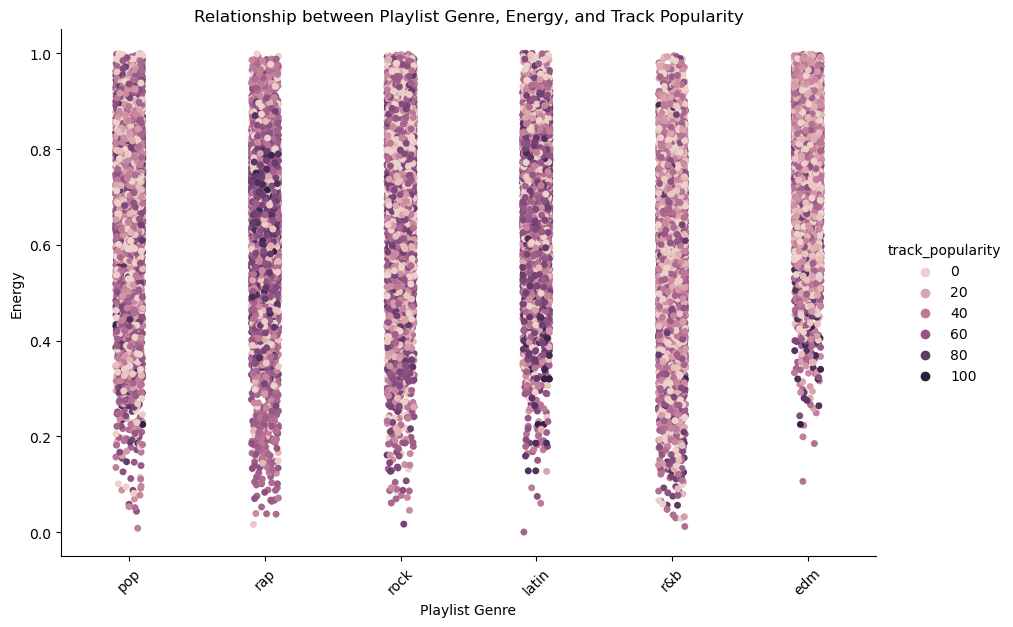

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=df, x='playlist_genre', y='energy', hue='track_popularity', height=6, aspect=1.5)
plt.title('Relationship between Playlist Genre, Energy, and Track Popularity')
plt.xlabel('Playlist Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

### This categorical plot graph shows the relationship between the playlist genre, energy and it relationship to track popularity (TP).

### Looking at this graph, one can rougly see that there are more dark clusters for rap, pop and latin than other playlist genre. All though rap genre seems like it has the darkest spots (high TP), this is contradicted when looked at a pointplot.

### The darker the cluster, more popular the track. 

### This can be further discovered by pointplot down below for better understand of the relationship.

C:\Users\Kevin\AppData\Local\Temp\ipykernel_2980\3636747954.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


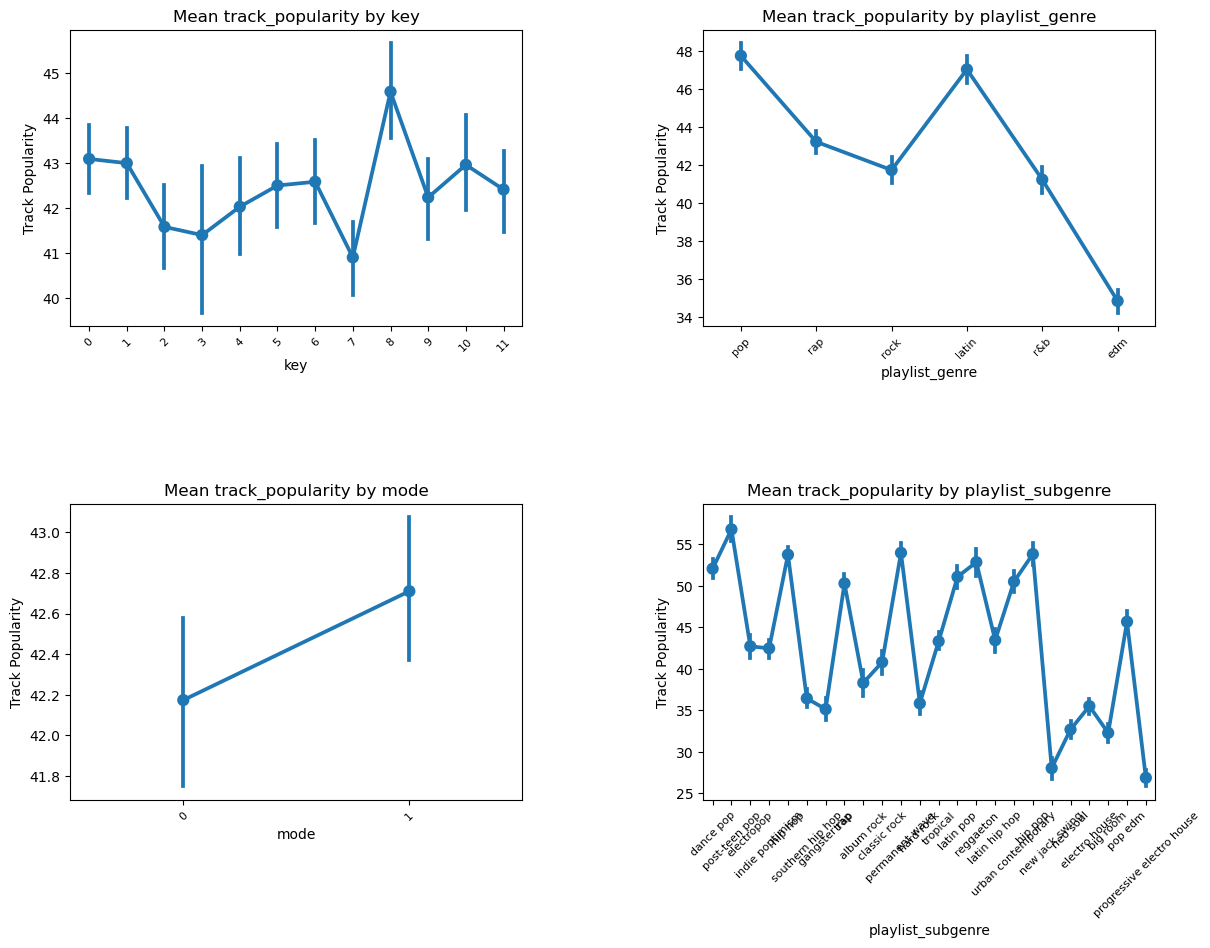

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

 
x_vars = ['key', 'playlist_genre', 'mode', 'playlist_subgenre']
y_var = 'track_popularity'

 
fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
axes = axes.flatten()

 
for i, x_var in enumerate(x_vars):
    sns.pointplot(data=df, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f'Mean {y_var} by {x_var}')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel('Track Popularity')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)


plt.tight_layout()
plt.show()


### As mentioned before pointplot is probably the best way to visualize track popularity to categorical variables like keys, playlist_genre, mode, and playlist_subgenre.

### Key: The data shows the Key 8 has the most popularity, while key 11 is the least favorite.

### Playlist_genre: The data shows pop has the highest TP, in second being latin, while edm being the lowest. Even though categorical plot showed higher popularity for rap over other genres, pointplot was able contradict that by giving a specific numeric value.

### Mode: The categorical variable mode has simply shown that mode 1 has a track popularity than 0.

### Playlist_subgenre: The data shows track popularity is the highest for dance pop and the lowest pop edm. However, this comparision for edm being the lowest popularity is 1:1 relationship. However, the track popularity changes for edm, when measured in energy. This can see by a relationship plot down below. 

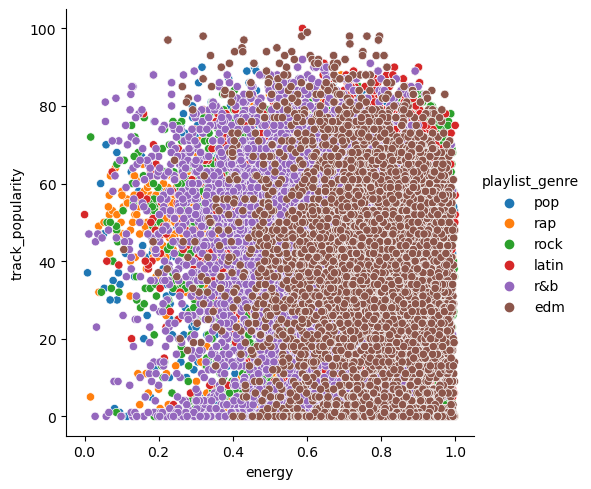

In [18]:
sns.relplot(data=df, x='energy', y='track_popularity', hue='playlist_genre')
plt.show()


### In this relationship plot, where there are more than two varibales involved, one can see edm has the most energy which also higher popularity along with in 2nd, r&B

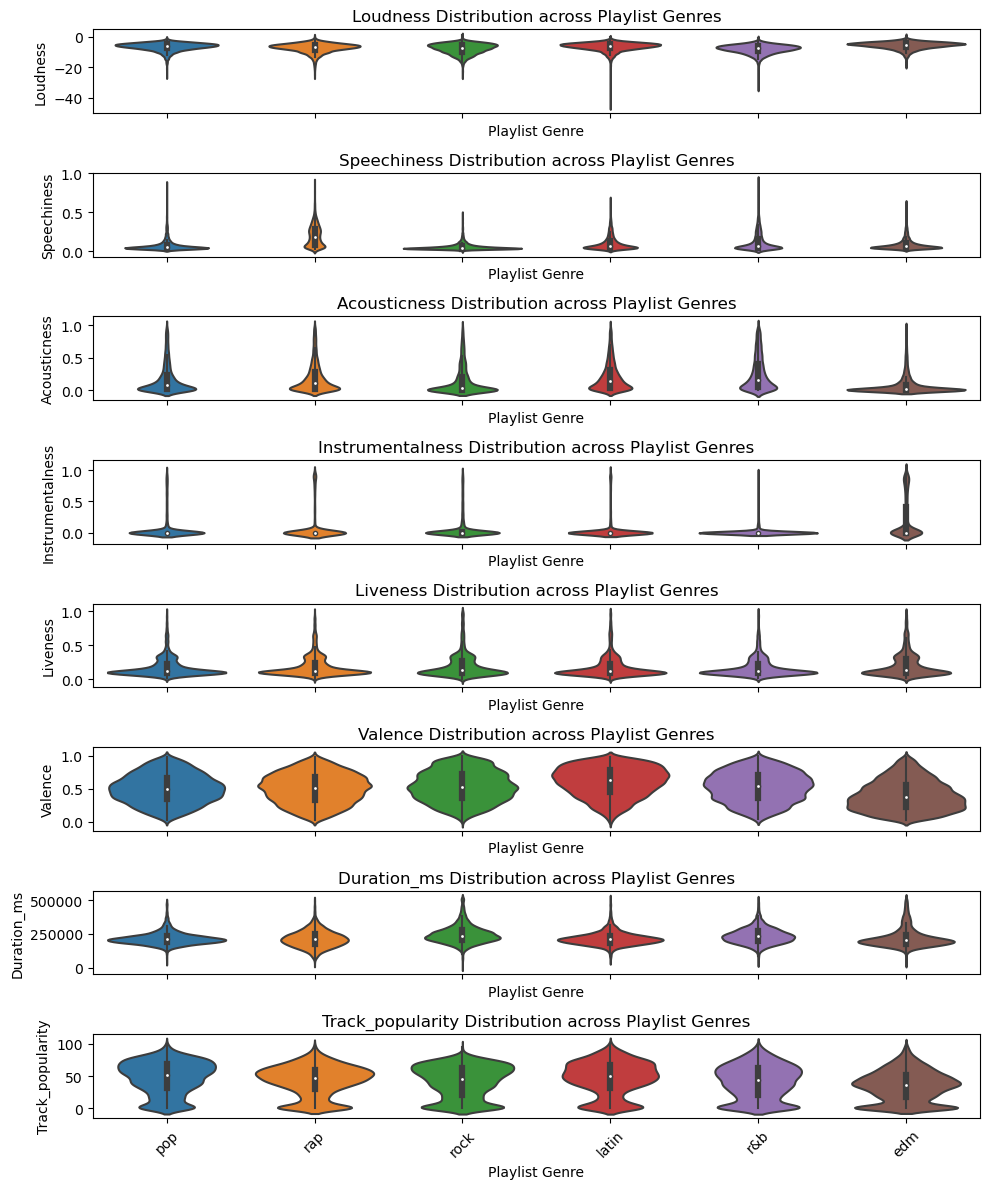

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

 
y_vars = ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms','track_popularity']

 
fig, axes = plt.subplots(nrows=len(y_vars), ncols=1, figsize=(10, 12), sharex=True)

 
for i, y_var in enumerate(y_vars):
    sns.violinplot(data=df, x='playlist_genre', y=y_var, ax=axes[i])
    axes[i].set_title(f'{y_var.capitalize()} Distribution across Playlist Genres')
    axes[i].set_ylabel(y_var.capitalize())
    axes[i].set_xlabel('Playlist Genre')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### This violin plot shows a great summary of the range of playlist genre to differnt continous variables. Just to give an example, pop has the highest track popularity compared to edm.

In [23]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame containing numerical columns
X_1 = df.select_dtypes('number').copy().to_numpy()

tots_within = []

K= range(1,31)

for k in K:
    km = KMeans(n_clusters=k, random_state=2100, n_init=25, max_iter=500)
    km= km.fit(X_1)
    
    tots_within.append(km.inertia_)

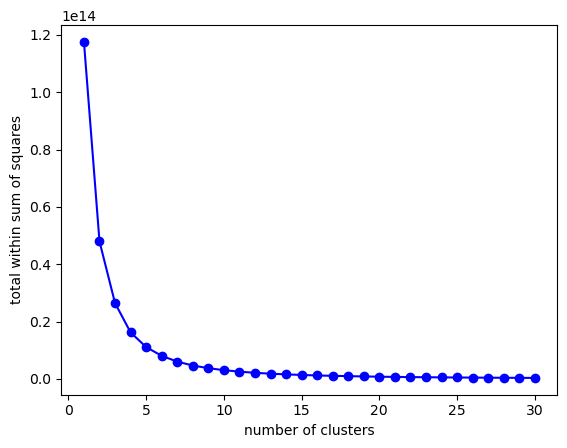

In [24]:
fig, ax =plt.subplots()

ax.plot(K, tots_within, 'bo-' )
ax.set_xlabel( 'number of clusters' )
ax.set_ylabel('total within sum of squares' )

plt.show()

### I chose K=6 as the k-means based on the data above based on optimal K value and categorical variable, playlist_genre. This is a estimate after all.

In [30]:
 clusters_6 = KMeans(n_clusters=6, random_state=2100, max_iter=500).fit_predict(X_1)

C:\Users\Kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
df_copy = df.copy()


In [34]:
df_copy['k6'] = pd.Series(clusters_6, index=df_copy.index).astype('category')

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


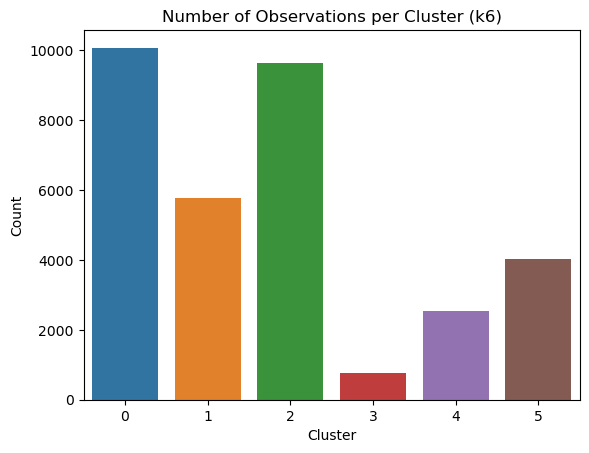

In [46]:
sns.countplot(data=df_copy, x='k6')
plt.title('Number of Observations per Cluster (k6)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


# PCA Clustering 

In [69]:
df_clean_copy = df.copy() 

In [71]:
df_clean_copy['k6'] = pd.Series(clusters_6, index=df_clean_copy.index).astype('category')

In [77]:
df_features_clean= df_clean_copy.select_dtypes('number').copy()

In [79]:
from sklearn.preprocessing import StandardScaler

df_pop = StandardScaler().fit_transform(df_features_clean)

In [81]:
df_pop.shape

(32833, 13)

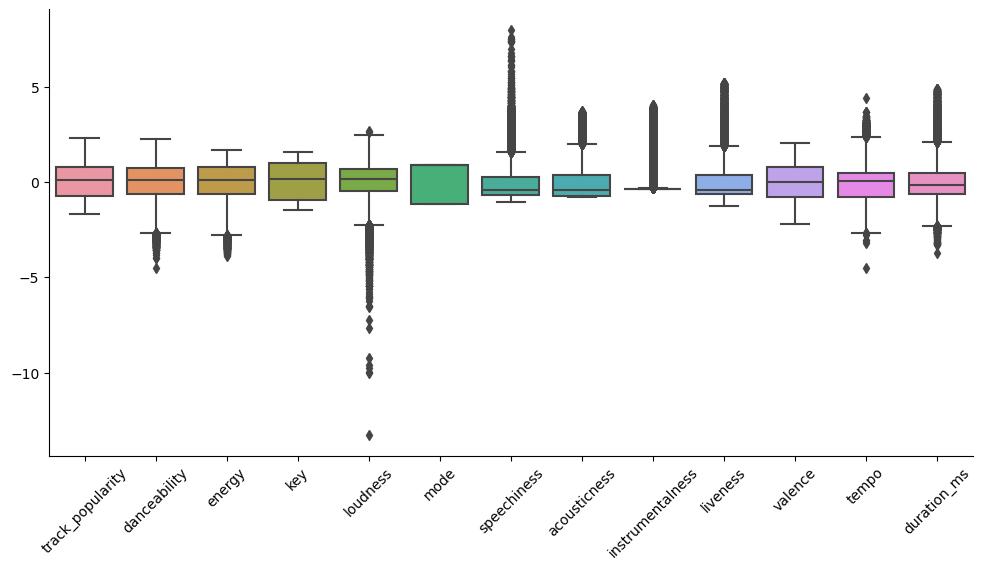

In [83]:
sns.catplot(data=pd.DataFrame(df_pop, columns=df_features_clean.columns), kind='box', aspect=2)

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

### Track Popularity: The values are tightly clustered with a few outliers, suggesting that most tracks have similar popularity scores with some extreme values.

### Danceability, Energy, Key, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, and Duration: These features also show the distribution of their values with some variation. For example, loudness and speechiness have many outliers, indicating that while most values are within a certain range, there are some tracks with significantly different loudness and speechiness levels.

### Loudness: This feature has a wider spread and more outliers, indicating greater variability in the loudness levels of tracks.

### Acousticness, Instrumentalness, and Speechiness: These features show a large number of outliers, suggesting some tracks are significantly different in these aspects compared to the majority.

### In summary, box plot helps identify the central tendency, spread, and outliers of each feature in the dataset, providing insights into the distribution and variability of the data.

# PCA anlysis 

In [89]:
from sklearn.decomposition import PCA

In [95]:
pca_df= PCA(n_components=2).fit_transform (df_pop)

In [97]:
pca_df = pd.DataFrame(pca_df, columns=['pc01', 'pc02'])


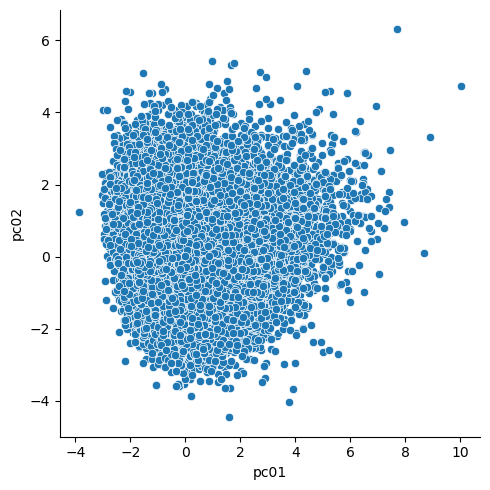

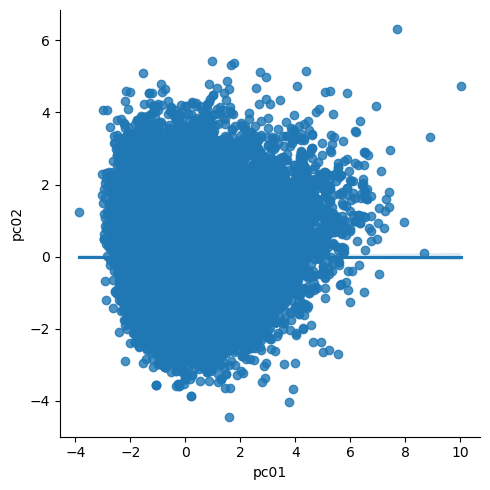

In [103]:
sns.relplot(data=pca_df, x='pc01', y='pc02')

plt.show()


sns.lmplot(data=pca_df, x='pc01', y='pc02')

plt.show()

### Relationship Plot:
#### Distribution Shape: The data points form a dense cluster with a roughly circular shape. This indicates that most of the variance in the dataset is captured within a compact region.

#### Outliers: There are some points scattered farther from the main cluster, indicating that these samples have different characteristics compared to the majority of the data.

### Linear Plot:
#### Regression Line: The horizontal regression line suggests that there is no strong linear relationship between the first and second principal components. 

#### Data Point Distribution: The distribution of points is consistent with the top plot, showing a dense cluster with some outliers.

### Conclusion:
#### The first two principal components (PC01 and PC02) capture significant variance in the dataset. The shape and spread of the data in these plots indicate that most of the variance is concentrated within a compact region.

#### No Strong Linear Correlation: The lack of a strong linear relationship between pc01 and pc02 

#### The presence of outliers indicates that there are some samples with unique characteristics that differ from the majority of the data.


In [146]:
pca_df[' track_popularity'] = df_clean.track_popularity 
pca_df[' playlist_genre'] = df_clean.playlist_genre

In [148]:
# Strip leading and trailing whitespaces from column names
pca_df.columns = pca_df.columns.str.strip()

# Check the columns to verify they are correctly formatted
print(pca_df.columns)

Index(['pc01', 'pc02', 'track_popularity', 'playlist_genre'], dtype='object')


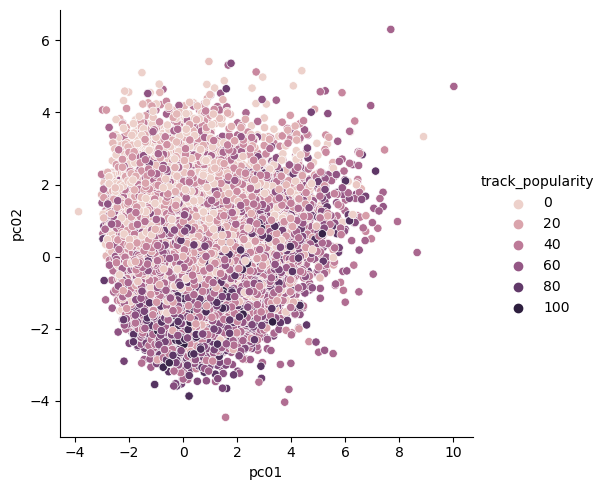

In [150]:
sns.relplot(data=pca_df, x='pc01', y='pc02', hue='track_popularity')
plt.show()

### 1) The data on the bottom form a dense cluster and as it spreads to up right, the TP became ligher or less TP.

### 2) There is a mix of popular and less popular tracks throughout the plot, with no clear pattern indicating a strong correlation between popularity and the principal components.

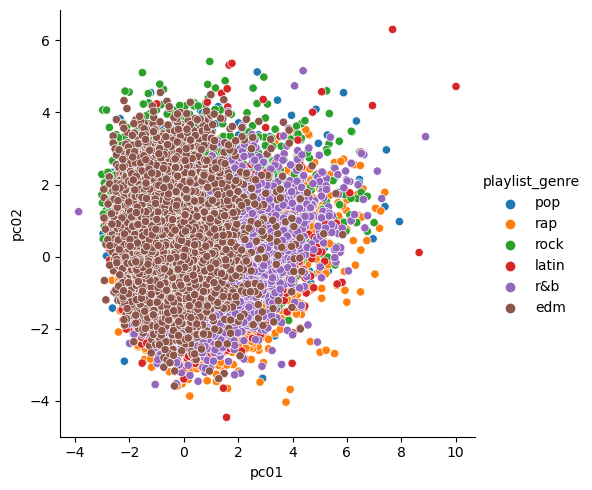

In [152]:
sns.relplot(data=pca_df, x='pc01', y='pc02', hue='playlist_genre')
plt.show()

### Conclusions based on PCA for the graph above  

### 1. EDM (brown): This genre appears to be the most densely clustered in the center, indicating that songs in this genre have similar characteristics captured by the first two principal components.

### 2. Other Genres: Genres like pop (blue), rap (orange), rock (green), Latin (red), and R&B (purple) are spread out more and are interspersed throughout the plot

### 3. The principal components capture significant variance in the data but do not completely differentiate between genres. This can be useful for understanding the structure of the dataset and identifying any patterns or outliers related to genre classification.

# Part 2: Model Fitting 

In [172]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [162]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv( songs_url )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [176]:
# Step 1: Transforming the data

# Ensure column names are stripped of any whitespace
df.columns = df.columns.str.strip()

# Copy the DataFrame
df_copy = df.copy()

# Create a copy of the copy_data
original_df = df_copy.copy()

# Ensure track_popularity is numeric
df_copy['track_popularity'] = pd.to_numeric(df_copy['track_popularity'], errors='coerce')

# Shift the track_popularity values
df_copy['track_pop_shift'] = np.where(df_copy.track_popularity == 100, df_copy.track_popularity - 0.1, df_copy.track_popularity)
df_copy['track_pop_shift'] = np.where(df_copy.track_popularity == 0, df_copy.track_popularity + 0.1, df_copy.track_pop_shift)

# Handle any remaining non-numeric values or missing values
df_copy['track_pop_shift'] = pd.to_numeric(df_copy['track_pop_shift'], errors='coerce').fillna(0)

# Calculate the logit transformed output
df_copy['track_pop_frac'] = df_copy['track_pop_shift'] / 100
df_copy['y'] = np.log(df_copy['track_pop_frac'] / (1 - df_copy['track_pop_frac']))

In [180]:
# Convert categorical columns to category type
categorical_columns = ['key', 'mode', 'playlist_genre', 'playlist_subgenre']
for column in categorical_columns:
    if column in df_copy.columns:
        df_copy[column] = df_copy[column].astype('category')

# Define and log transform continuous variables
continuous_columns = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]
for col in continuous_columns:
    df_copy[col] = np.log1p(df_copy[col])

# Remove any rows that have become invalid after log transformation
df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
df_copy.dropna(subset=continuous_columns, inplace=True)

# Ensure there are enough valid rows left in the dataset
print(f"Number of valid rows after processing: {df_copy.shape[0]}")

Number of valid rows after processing: 50


C:\Users\Kevin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Standardize the continuous variables
scaler = StandardScaler()
df_copy[continuous_columns] = scaler.fit_transform(df_copy[continuous_columns])

# Create quadratic and cubic polynomial terms for continuous variables
for col in continuous_columns:
    df_copy[f'{col}_squared'] = df_copy[col] ** 2
    df_copy[f'{col}_cubed'] = df_copy[col] ** 3

# Define model formulas
model_formulas = {
    "Intercept-only": "y ~ 1",
    "Categorical inputs with additive features": 'y ~ ' + ' + '.join([f'C({col})' for col in categorical_columns]),
    "Continuous inputs with linear additive features": 'y ~ ' + ' + '.join(continuous_columns),
    "All inputs (continuous and categorical) with linear additive features": 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns]),
    "Continuous inputs with linear main effect and pair-wise interactions": 'y ~ ' + ' + '.join(continuous_columns) + ' + ' + ' + '.join([f'I({x}*{y})' for i, x in enumerate(continuous_columns) for y in continuous_columns[i+1:]]),
    "Interact categorical inputs with continuous inputs": 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns]) + ' + ' + ' + '.join([f'C({cat})*{cont}' for cat in categorical_columns for cont in continuous_columns])
}

# Additional model formulas
quadratic_interactions = ' + '.join([f'C({cat})*I({cont}**2)' for cat in categorical_columns for cont in continuous_columns])
cubic_interactions = ' + '.join([f'C({cat})*I({cont}**3)' for cat in categorical_columns for cont in continuous_columns])
model_formulas["Interact categorical inputs with quadratic polynomial continuous inputs"] = (
    'y ~ ' + ' + '.join(continuous_columns + [f'{col}_squared' for col in continuous_columns] + [f'C({col})' for col in categorical_columns]) + 
    ' + ' + ' + '.join([f'C({cat})*{cont}' for cat in categorical_columns for cont in continuous_columns]) + 
    ' + ' + quadratic_interactions
)


# Create a DataFrame to store the results
results = pd.DataFrame(columns=["Model Name", "Model Formula", "Number of Coefficients", "R-squared", "RMSE", "Num Significant Coefficients"])

# Fit each model and collect the results
for model_name, formula in model_formulas.items():
    model = smf.ols(formula, data=df_copy).fit()
    num_coefficients = len(model.params)
    r_squared = model.rsquared
    rmse = np.sqrt(mean_squared_error(df_copy['y'], model.fittedvalues))
    num_significant_coefficients = (model.pvalues < 0.05).sum()  # Count of statistically significant coefficients
    model_results = pd.DataFrame({
        "Model Name": [model_name],
        "Model Formula": [formula],
        "Number of Coefficients": [num_coefficients],
        "R-squared": [r_squared],
        "RMSE": [rmse],
        "Num Significant Coefficients": [num_significant_coefficients]
    })
    results = pd.concat([results, model_results], ignore_index=True)

# Display the results
print(results)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_2980\4288072991.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, model_results], ignore_index=True)


                                          Model Name  \
0                                     Intercept-only   
1          Categorical inputs with additive features   
2    Continuous inputs with linear additive features   
3  All inputs (continuous and categorical) with l...   
4  Continuous inputs with linear main effect and ...   
5  Interact categorical inputs with continuous in...   
6  Interact categorical inputs with quadratic pol...   

                                       Model Formula Number of Coefficients  \
0                                              y ~ 1                      1   
1  y ~ C(key) + C(mode) + C(playlist_genre) + C(p...                     41   
2  y ~ danceability + energy + loudness + speechi...                     11   
3  y ~ danceability + energy + loudness + speechi...                     51   
4  y ~ danceability + energy + loudness + speechi...                     56   
5  y ~ danceability + energy + loudness + speechi...                    451  

In [186]:
results

,Model Name,Model Formula,Number of Coefficients,R-squared,RMSE,Num Significant Coefficients
0,Intercept-only,y ~ 1,1,0.000000,2.145609,1
1,Categorical inputs with additive features,y ~ C(key) + C(mode) + C(playlist_genre) + C(p...,41,0.536920,1.460087,0
2,Continuous inputs with linear additive features,y ~ danceability + energy + loudness + speechi...,11,0.186623,1.935070,1
3,All inputs (continuous and categorical) with l...,y ~ danceability + energy + loudness + speechi...,51,0.811238,0.932198,3
4,Continuous inputs with linear main effect and ...,y ~ danceability + energy + loudness + speechi...,56,0.883635,0.731917,3
5,Interact categorical inputs with continuous in...,y ~ danceability + energy + loudness + speechi...,451,0.948335,0.487697,0
6,Interact categorical inputs with quadratic pol...,y ~ danceability + energy + loudness + speechi...,871,0.948335,0.487697,0


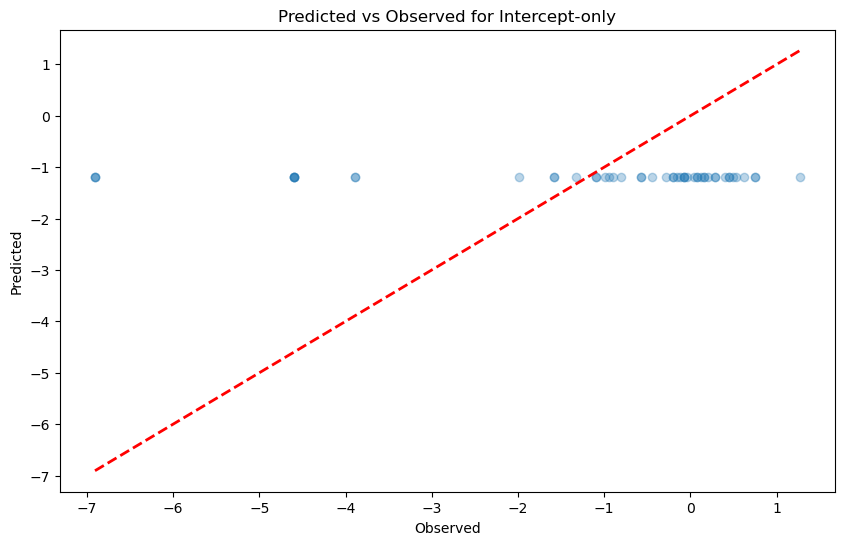

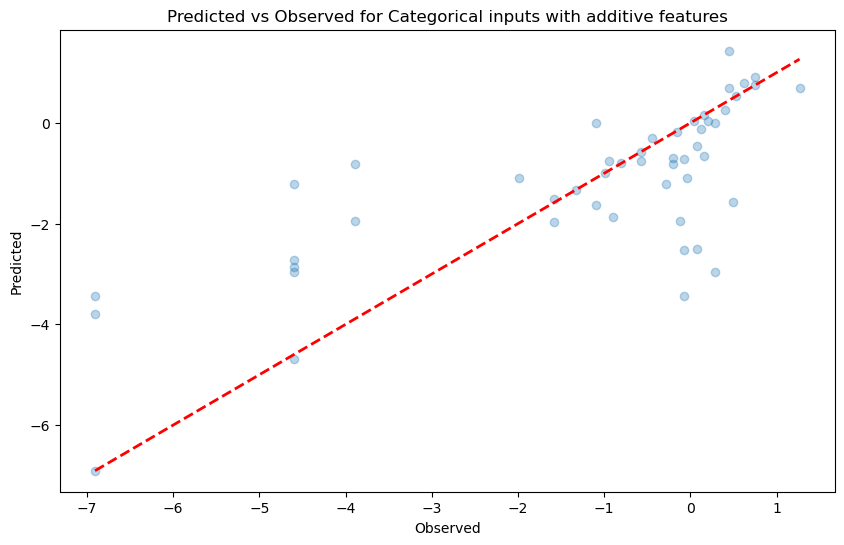

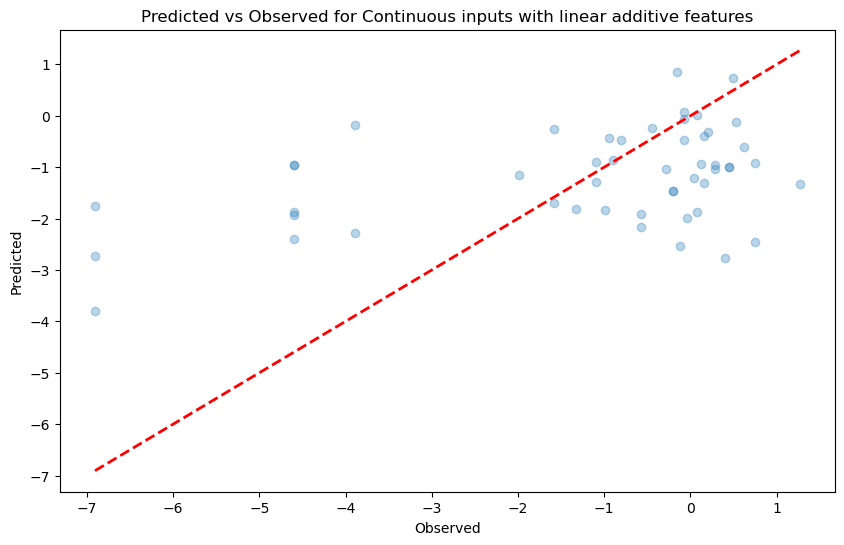

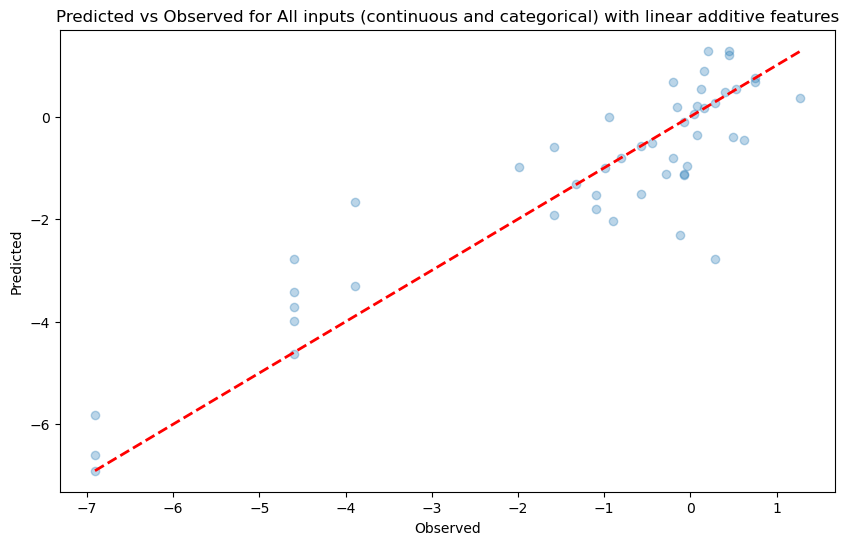

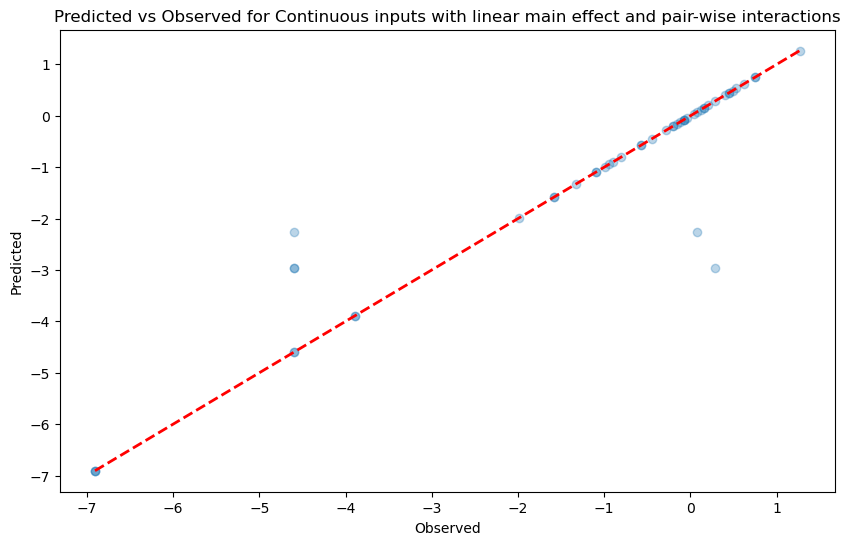

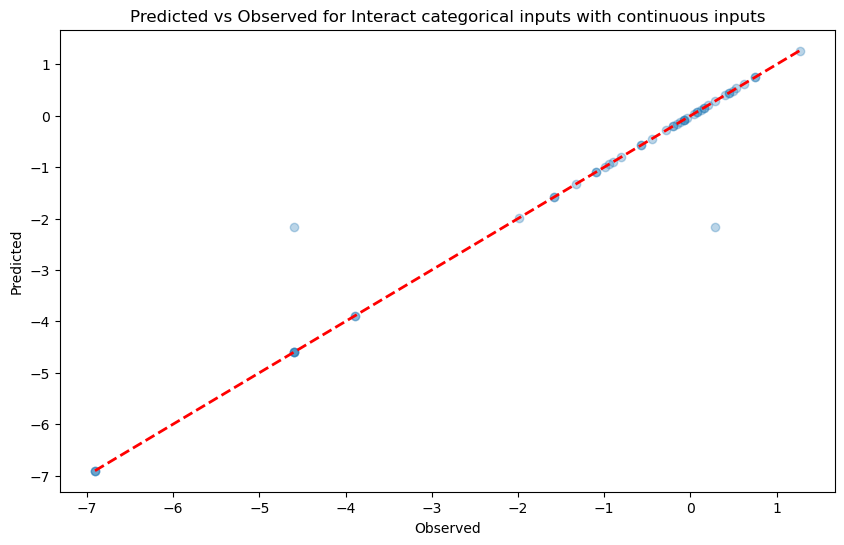

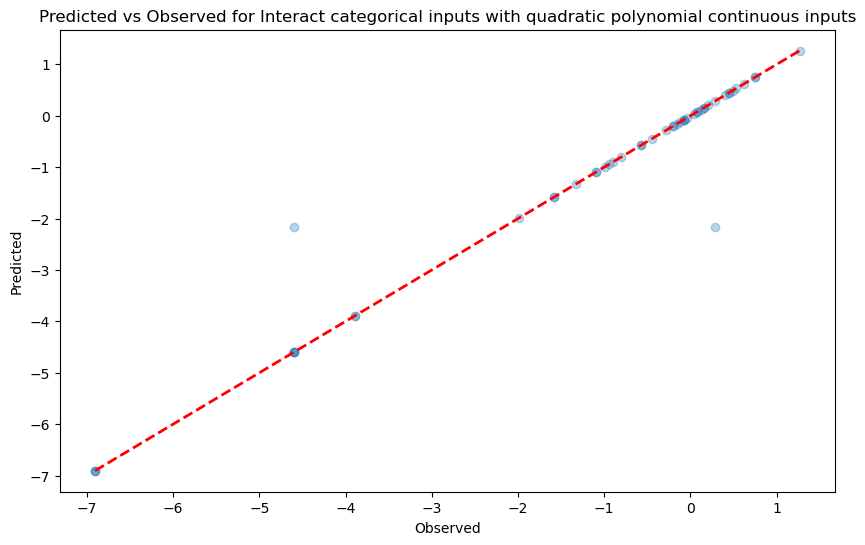

In [191]:
# Plotting the predicted vs observed for each model
def plot_predicted_vs_observed(model, data, response_var):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[response_var], model.fittedvalues, alpha=0.3)
    plt.plot([data[response_var].min(), data[response_var].max()], [data[response_var].min(), data[response_var].max()], 'r--', linewidth=2)
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title(f'Predicted vs Observed for {model_name}')
    plt.show()

for model_name, formula in model_formulas.items():
    model = smf.ols(formula=formula, data=df_copy).fit()
    plot_predicted_vs_observed(model, df_copy, 'y')

### The conclusion to make for the table and graph:

#### 1) Increasing Complexity: As the models become more complex, including interactions and quadratic terms, both the R-squared values and RMSE improve, indicating better fit and predictive accuracy.

#### 2) Best Models: Model5 and Model6 have the highest R-squared and lowest RMSE, indicating they are the best models in terms of explanatory power and predictive accuracy. Although, model 4 be a better choice because this model could be the less overfitted compared to other models. However, Model 5 is best choice when using the RMSE indicator.

#### 3) Dimishing Returns: Moving from Model5 to Model6 does not improve performance, suggesting that the added complexity of Model6 does not provide additional explanatory power or accuracy.

#### 4) Model Selection: For practical purposes, Model5 might be preferred over Model6 due to its lower complexity while providing the same level of accuracy.

# Models: Predictions 

In [195]:
from sklearn.model_selection import train_test_split

In [197]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df_copy, test_size=0.2, random_state=2100)

In [216]:
# Define the model formula for Model 3
model_3_formula = 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns])

# Define the model formula for Model 5 (Continuous inputs with linear main effect and pair-wise interactions)
model_5_formula = 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns]) + ' + ' + ' + '.join([f'C({cat})*{cont}' for cat in categorical_columns for cont in continuous_columns])

# Fit Model 3 using statsmodels
model_3 = smf.ols(formula=model_3_formula, data=train_data).fit()

# Fit Model 4 using statsmodels
model_5 = smf.ols(formula=model_4_formula, data=train_data).fit()

Coefficients for Model 3 (All inputs with linear additive features):


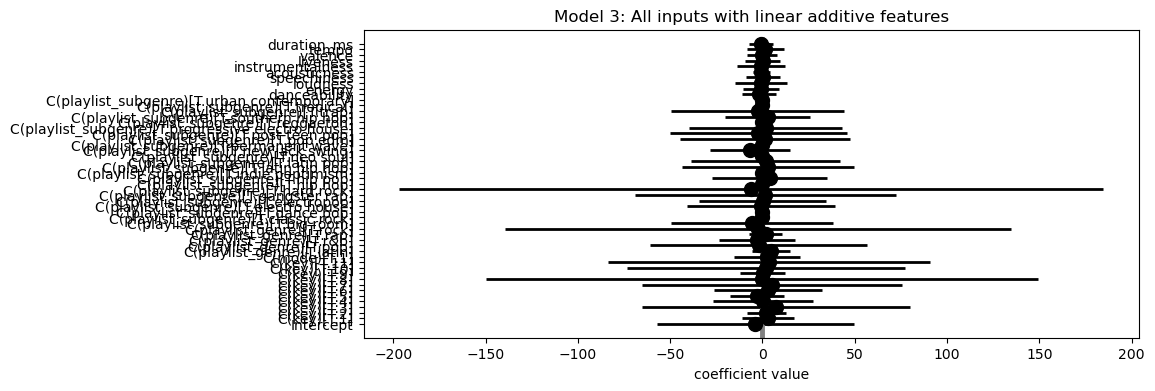

Coefficients for Model 5 (Continuous inputs with linear main effect and pair-wise interactions):


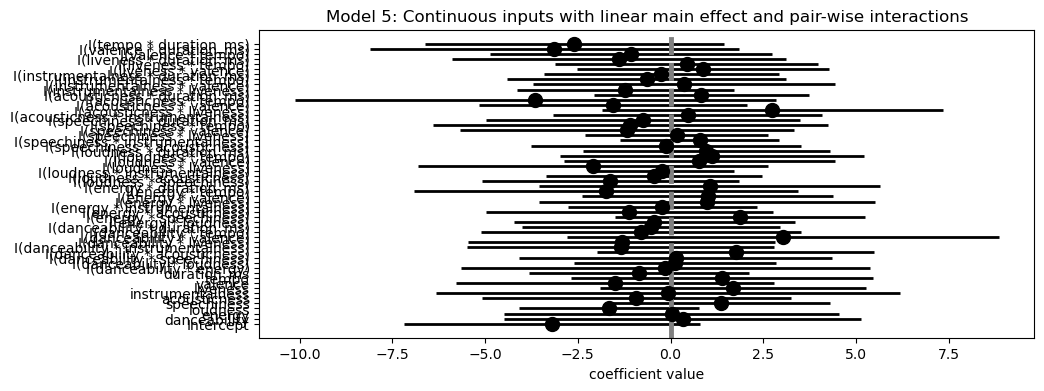

In [218]:
# Define the my_coefplot function with the provided template
def my_coefplot(mod, title, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    conf = mod.conf_int()
    ax.errorbar(y=mod.params.index,
                x=mod.params,
                xerr=[mod.params - conf[0], conf[1] - mod.params],
                fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    ax.set_title(title)
    
    plt.show()

# Plot the coefficients using my_coefplot function for Model 3
print("Coefficients for Model 3 (All inputs with linear additive features):")
my_coefplot(model_3, title='Model 3: All inputs with linear additive features')

# Plot the coefficients using my_coefplot function for Model 5
print("Coefficients for Model 5 (Continuous inputs with linear main effect and pair-wise interactions):")
my_coefplot(model_5, title='Model 5: Continuous inputs with linear main effect and pair-wise interactions')

### Interpretation of the Coefficient model

#### Model 3: The coefficients are more spread out, indicating that some features have a strong linear relationship with track_popularity. However, the high uncertainty for some coefficients suggests potential overfitting or multicollinearity.

#### Model 4: The inclusion of interaction terms helps in better capturing the relationships between features and track_popularity, resulting in more distributed coefficient values. This model seems to better handle the complexity of the data, although some uncertainty remains.

## Regression Grid 1

In [222]:
# Generate 101 unique values between the min and max of energy in the training set
energy_min = train_data['energy'].min()
energy_max = train_data['energy'].max()
energy_values = np.linspace(energy_min, energy_max, 101)

# Prepare a dataframe for prediction
prediction_grid = pd.DataFrame({
    'energy': energy_values,
    'danceability': train_data['danceability'].mean(),
    'loudness': train_data['loudness'].mean(),
    'speechiness': train_data['speechiness'].mean(),
    'acousticness': train_data['acousticness'].mean(),
    'instrumentalness': train_data['instrumentalness'].mean(),
    'liveness': train_data['liveness'].mean(),
    'valence': train_data['valence'].mean(),
    'tempo': train_data['tempo'].mean(),
    'duration_ms': train_data['duration_ms'].mean(),
    'key': train_data['key'].mode()[0],
    'mode': train_data['mode'].mode()[0],
    'playlist_genre': train_data['playlist_genre'].mode()[0],
    'playlist_subgenre': train_data['playlist_subgenre'].mode()[0]
})

# Make predictions with both models
predictions_model_3 = model_3.get_prediction(prediction_grid)
predictions_model_5 = model_5.get_prediction(prediction_grid)

# Extract prediction summaries
summary_model_3 = predictions_model_3.summary_frame()
summary_model_5 = predictions_model_5.summary_frame()



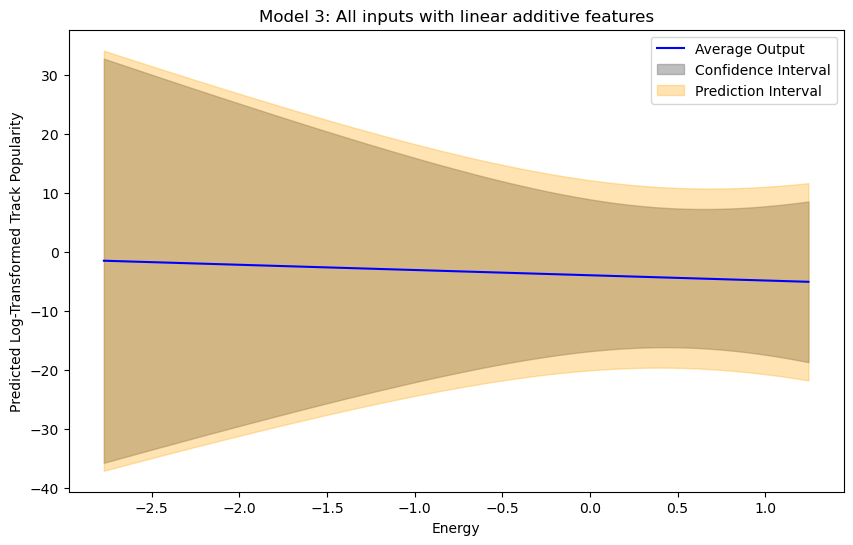

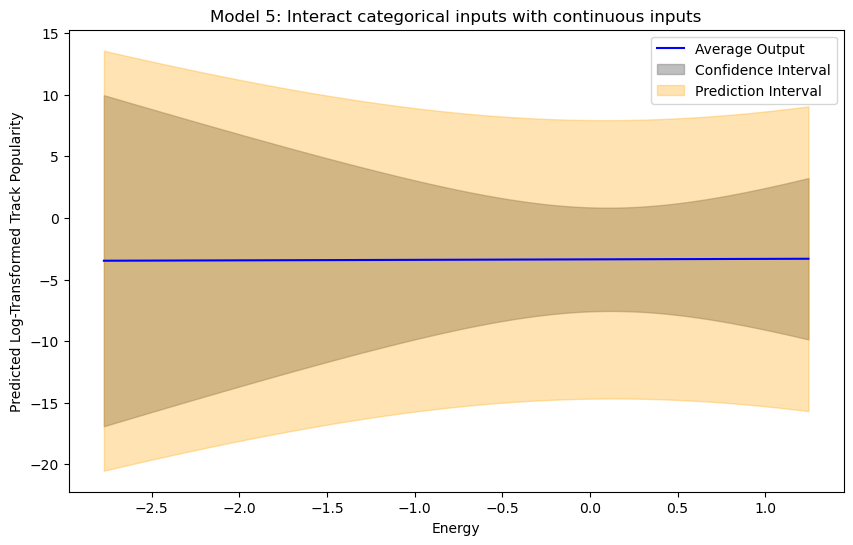

In [232]:
# Plot the results
def plot_predictions(predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(energy_values, predictions['mean'], label='Average Output', color='blue')
    plt.fill_between(energy_values, predictions['mean_ci_lower'], predictions['mean_ci_upper'], color='grey', alpha=0.5, label='Confidence Interval')
    plt.fill_between(energy_values, predictions['obs_ci_lower'], predictions['obs_ci_upper'], color='orange', alpha=0.3, label='Prediction Interval')
    plt.xlabel('Energy')
    plt.ylabel('Predicted Log-Transformed Track Popularity')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot predictions for Model 3
plot_predictions(summary_model_3, 'Model 3: All inputs with linear additive features')

# Plot predictions for Model 5
plot_predictions(summary_model_5, 'Model 5: Interact categorical inputs with continuous inputs')


## Interpretation of the Predication (Model 3)

### The average output remains relatively constant across different values of energy, indicating that this feature has little to no linear relationship with the log-transformed track popularity in Model 3.

### The width of the confidence and prediction intervals increases slightly at the extremes of the energy values, indicating more uncertainty in predictions at these points.

## Interpretation of the Predication (Model 5)

### Similar to Model 3, the average output remains relatively constant across different values of energy, indicating that the feature energy does not have a significant linear effect on the log-transformed track popularity in Model 5 either.

### The confidence and prediction intervals are wider compared to Model 3, indicating more variability and uncertainty in the predictions. This could be due to the complexity introduced by interaction terms.

# Regression Grid 2

In [246]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
# Assuming df_copy is your dataset and continuous_columns, categorical_columns are defined

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_copy, test_size=0.2, random_state=2100)

# Generate unique values for energy (primary_input)
energy_min = train_data['energy'].min()
energy_max = train_data['energy'].max()
energy_values = np.linspace(energy_min, energy_max, 101)

# Generate 3 unique values for danceability and liveness
danceability_values = np.linspace(train_data['danceability'].min(), train_data['danceability'].max(), 3)
liveness_values = np.linspace(train_data['liveness'].min(), train_data['liveness'].max(), 3)

# Sample categorical combinations (reduce to 3 to manage memory)
categorical_combinations_sample = train_data[['key', 'mode', 'playlist_genre', 'playlist_subgenre']].drop_duplicates().sample(n=3, random_state=2100)

# Create the prediction grid (Itertools( for creating combinations)
prediction_grid = pd.DataFrame(list(itertools.product(
    energy_values,
    danceability_values,
    liveness_values,
    categorical_combinations_sample['key'],
    categorical_combinations_sample['mode'],
    categorical_combinations_sample['playlist_genre'],
    categorical_combinations_sample['playlist_subgenre']
)), columns=[
    'energy', 'danceability', 'liveness', 'key', 'mode', 'playlist_genre', 'playlist_subgenre'
])

# Set remaining continuous inputs to their mean values
mean_values = train_data[[
    'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'duration_ms'
]].mean()

for col in mean_values.index:
    prediction_grid[col] = mean_values[col]

# Ensure categorical columns are set correctly
for col in ['key', 'mode', 'playlist_genre', 'playlist_subgenre']:
    prediction_grid[col] = prediction_grid[col].astype(train_data[col].dtype)

# Fit the models using statsmodels
model_3_formula = 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns])
model_5_formula = 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns]) + ' + ' + ' + '.join([f'C({cat})*{cont}' for cat in categorical_columns for cont in continuous_columns])

model_3 = smf.ols(formula=model_3_formula, data=train_data).fit()
model_5 = smf.ols(formula=model_5_formula, data=train_data).fit()

# Make predictions with both models
predictions_model_3 = model_3.get_prediction(prediction_grid)
predictions_model_5 = model_5.get_prediction(prediction_grid)

# Extract prediction summaries
summary_model_3 = predictions_model_3.summary_frame()
summary_model_5 = predictions_model_5.summary_frame()

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

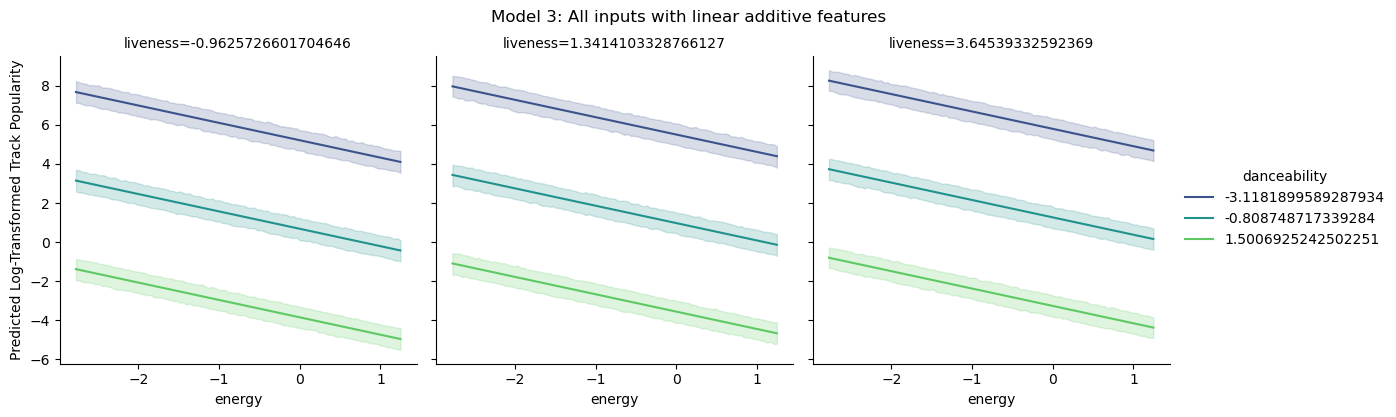

C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kevin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

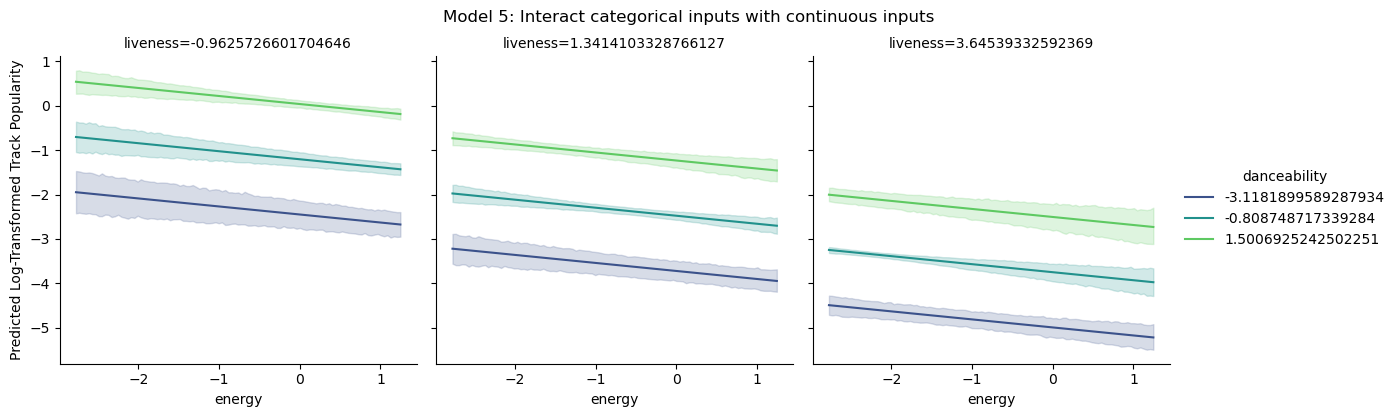

In [250]:
# Add primary, secondary, and tertiary inputs back to the summaries
for col in ['energy', 'danceability', 'liveness', 'key', 'mode', 'playlist_genre', 'playlist_subgenre']:
    summary_model_3[col] = prediction_grid[col]
    summary_model_5[col] = prediction_grid[col]

# Plot the results
def plot_predictions_grid(predictions, primary_input, title, secondary_input, tertiary_input):
    g = sns.FacetGrid(predictions, col=tertiary_input, hue=secondary_input, col_wrap=3, height=4, palette="viridis")
    g.map(sns.lineplot, primary_input, 'mean')
    g.add_legend()
    g.set_axis_labels(primary_input, 'Predicted Log-Transformed Track Popularity')
    g.set_titles(col_template=f'{tertiary_input}={{col_name}}')
    g.fig.suptitle(title, y=1.03)
    plt.show()

# Plot predictions for Model 3
plot_predictions_grid(summary_model_3, 'energy', 'Model 3: All inputs with linear additive features', 'danceability', 'liveness')

# Plot predictions for Model 5
plot_predictions_grid(summary_model_5, 'energy', 'Model 5: Interact categorical inputs with continuous inputs', 'danceability', 'liveness')

### Model 3: All inputs with linear additive features (Interpretion) 

#### Effect of Energy: As energy increases, the predicted log-transformed track popularity generally decreases across all panels and levels of danceability.

#### Levels of Liveness: The three panels show different levels of liveness. The effect of energy on track popularity is consistent across these levels, though the intercepts differ.

#### Danceability: Different lines within each panel represent different levels of danceability. Higher danceability levels result in higher predicted track popularity, but the overall trend with energy remains negative.

### Model 5: Interact categorical inputs with continuous inputs( Interpretion )

#### Effect of Energy: Similar to Model 3, as energy increases, the predicted log-transformed track popularity generally decreases across all panels and levels of danceability.

#### Levels of Liveness: The effect of energy on track popularity is consistent across different levels of liveness, but the intercepts differ.

#### Danceability: Different lines within each panel represent different levels of danceability. The patterns are similar to Model 3, with higher danceability levels generally corresponding to higher predicted track popularity, but the overall trend with energy is negative.

# F. Models: Performance and Validations 

In [263]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.formula.api as smf

In [265]:
# Assuming df_copy is your dataset and continuous_columns, categorical_columns are defined

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_copy, test_size=0.2, random_state=2100)

# Define model formulas
model_1_formula = 'y ~ 1'
model_3_formula = 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns])
model_5_formula = 'y ~ ' + ' + '.join(continuous_columns + [f'C({col})' for col in categorical_columns]) + ' + ' + ' + '.join([f'C({cat})*{cont}' for cat in categorical_columns for cont in continuous_columns])

# Prepare a function to fit the model and calculate RMSE for cross-validation
def cross_val_rmse(formula, data, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=2100)
    rmse_scores = []

    for train_index, val_index in kf.split(data):
        train_fold, val_fold = data.iloc[train_index], data.iloc[val_index]
        model = smf.ols(formula=formula, data=train_fold).fit()
        predictions = model.predict(val_fold)
        rmse = np.sqrt(np.mean((val_fold['y'] - predictions) ** 2))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Perform cross-validation for each model
rmse_model_1 = cross_val_rmse(model_1_formula, df_copy)
rmse_model_3 = cross_val_rmse(model_3_formula, df_copy)
rmse_model_5 = cross_val_rmse(model_5_formula, df_copy)

print(f"RMSE for Model 1 (Intercept-only): {rmse_model_1}")
print(f"RMSE for Model 3 (All inputs with linear additive features): {rmse_model_3}")
print(f"RMSE for Model 5 (Interact categorical inputs with continuous inputs): {rmse_model_5}")


RMSE for Model 1 (Intercept-only): 2.0994499426190747
RMSE for Model 3 (All inputs with linear additive features): 9.386667543255705
RMSE for Model 5 (Interact categorical inputs with continuous inputs): 2.571870931742228


In [267]:
# Prepare a function to fit the model and calculate RMSE for cross-validation
def cross_val_rmse(formula, data, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=2100)
    rmse_scores = []

    for train_index, val_index in kf.split(data):
        train_fold, val_fold = data.iloc[train_index], data.iloc[val_index]
        model = smf.ols(formula=formula, data=train_fold).fit()
        predictions = model.predict(val_fold)
        rmse = np.sqrt(np.mean((val_fold['y'] - predictions) ** 2))
        rmse_scores.append(rmse)

    return rmse_scores

# Perform cross-validation for each model
rmse_model_1 = cross_val_rmse(model_1_formula, df_copy)
rmse_model_3 = cross_val_rmse(model_3_formula, df_copy)
rmse_model_5 = cross_val_rmse(model_5_formula, df_copy)

# Calculate mean and confidence intervals
mean_rmse_model_1 = np.mean(rmse_model_1)
ci_rmse_model_1 = 1.96 * np.std(rmse_model_1) / np.sqrt(len(rmse_model_1))

mean_rmse_model_3 = np.mean(rmse_model_3)
ci_rmse_model_3 = 1.96 * np.std(rmse_model_3) / np.sqrt(len(rmse_model_3))

mean_rmse_model_5 = np.mean(rmse_model_5)
ci_rmse_model_5 = 1.96 * np.std(rmse_model_5) / np.sqrt(len(rmse_model_5))

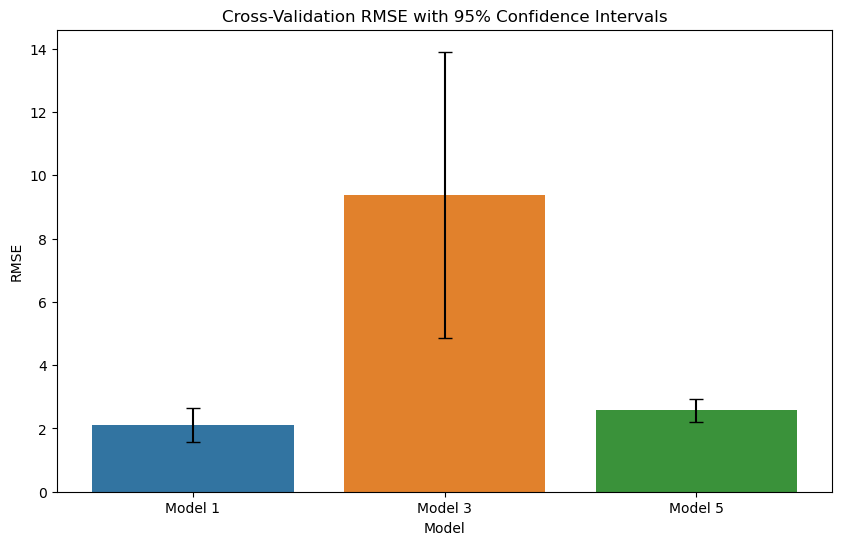

In [269]:
# Prepare data for visualization
models = ['Model 1', 'Model 3', 'Model 5']
mean_rmses = [mean_rmse_model_1, mean_rmse_model_3, mean_rmse_model_5]
ci_rmses = [ci_rmse_model_1, ci_rmse_model_3, ci_rmse_model_5]

cv_results = pd.DataFrame({
    'Model': models,
    'Mean RMSE': mean_rmses,
    '95% CI': ci_rmses
})

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean RMSE', data=cv_results, capsize=0.2)
for index, row in cv_results.iterrows():
    plt.errorbar(x=index, y=row['Mean RMSE'], yerr=row['95% CI'], fmt='none', c='black', capsize=5)
plt.title('Cross-Validation RMSE with 95% Confidence Intervals')
plt.ylabel('RMSE')
plt.show()

### Cross Validation Table:

#### Model 1:

### Has the lowest RMSE among the three models. The error bar is relatively small, indicating low variability in the RMSE estimates across cross-validation folds.


#### Model 3:

#### Has the highest RMSE, indicating the worst performance among the three models. The error bar is very large, suggesting high variability in the RMSE estimates, which could be due to overfitting or instability in the model.


#### Model 5: 

#### Has an RMSE slightly higher than Model 1 but much lower than Model 3. The error bar is small, similar to Model 1, indicating low variability in the RMSE estimates.

# Final Thoughts

### Even though model 1 has the lowest RMSE, it formulation is the simplist with no complex relationship between variables, which is not true for model 5 which has categorical inputs with continuous inputs( Interpretion). Even though model 3 (.88) and model 5 (.94) for R-squred value, these independent variables are not able to create any noticable impact on track popularity. I want to attribute this to couple of possibilites. First, is the wide variance in the data as one can notice in the cofficient plot, leading to increase noise in data leading to high insignificance, the second factor is the issue of multicolinarity, where it becomes diffuclt to understand individual effect on the predictor value, which could have led to many of the variables to insignificant. Overfitting is another issue, however using cross validation, we were able to chose model 5 as the moderate fit of all the models. Finally, it can human error when it came to preprocessing the data wrong, not seperating the categorical variables from continuous variable, data transformation error, and miscalculation of metrics. Overall, the model created under the given continous variables are not good indicator to predict popularity f the song 